# Interpretation of Functional Impact Assessment of KANSL1 and its Roles in Altering the Clinical Deformation in Alzheimer’s Disease

This notebook represents the methodology with technical details developed for Interpreting the Functional Impact Assessment of SNPs in Altering the Clinical Deformation in Alzheimer’s Disease  

# Step 1:

**Extracting the refered SNPs-Neuroimaging features associated with Alzheimer' disease in literatures**

Using SCAIView (http://academia.scaiview.com/academia), the two datasets containing SNPs-PMIDs and Neuroimaging_Features-PMIDs were generated. 
(The dataset creation instruction is described with ordered screenshot (1 to 5) in Dataset_Creation instruction folder).

# Step 2 :

**Making co-occurence SNPs-Neuroimaging Features table**

Reading the created datasets, processing them and making the co-occurence SNPs-Neuroimaging Features table

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

folder_path = "/home/skhatami/SNPs-Neuroimaging associations"

## Reading the two datasets and transforming to dataframes

SNPs_PMIDs = pd.DataFrame(pd.read_csv(os.path.join(folder_path + "/" + "SNPs_PMIDs.txt"), sep="\t", names=["SNPs", "PMIDs"]))
Neuro_Feats_PMIDs = pd.DataFrame(pd.read_csv(os.path.join(folder_path + "/" + "Neuroimaging_Features_PMIDs.txt"),sep="\t",names=["Neuroimaging_Features", "PMIDs"]))

## Processing the SNPs_PMIDs dataFrame

for index, row in SNPs_PMIDs.iterrows():
    if "No mapping:" in row["SNPs"]:
        SNPs_PMIDs.at[index,"SNPs"] = row["SNPs"].replace("No mapping:","")
        
## Finding the co-mentioned SNPs-Neuroimaging features based on PMIDs

SNPs_Neuro_Feats_PMIDs_Merge = pd.DataFrame(pd.merge(SNPs_PMIDs,Neuro_Feats_PMIDs, on = "PMIDs"))
print(SNPs_Neuro_Feats_PMIDs_Merge)

SNPs_Neuro_Feats_PMIDs_Merge.to_csv(folder_path + "/" + "SNPs_Neuroimaging_associations.tsv", sep="\t", index=False) 


## Unique Number of SNPs and Neuroimaging Features

Unique_SNPs = SNPs_Neuro_Feats_PMIDs_Merge['SNPs'].unique()
Unique_Neuro_Feats = SNPs_Neuro_Feats_PMIDs_Merge['Neuroimaging_Features'].unique()

print('Number of unique SNPs:',len(Unique_SNPs))
print('Number of unique Neuroimaging_Features:',len(Unique_Neuro_Feats))

             SNPs     PMIDs                Neuroimaging_Features
0      RS11136000  23573206                                  Tau
1      RS11136000  23573206                  Cerebrospinal fluid
2      RS11136000  23573206                                p_tau
3       RS2075650  23573206                                  Tau
4       RS2075650  23573206                  Cerebrospinal fluid
5       RS2075650  23573206                                p_tau
6       RS1868402  23573206                                  Tau
7       RS1868402  23573206                  Cerebrospinal fluid
8       RS1868402  23573206                                p_tau
9       RS2304933  23573206                                  Tau
10      RS2304933  23573206                  Cerebrospinal fluid
11      RS2304933  23573206                                p_tau
12     RS16940758  23573206                                  Tau
13     RS16940758  23573206                  Cerebrospinal fluid
14     RS16940758  235732

**2-1: **The distribution of SNPs per neuroimaging feature is plotted

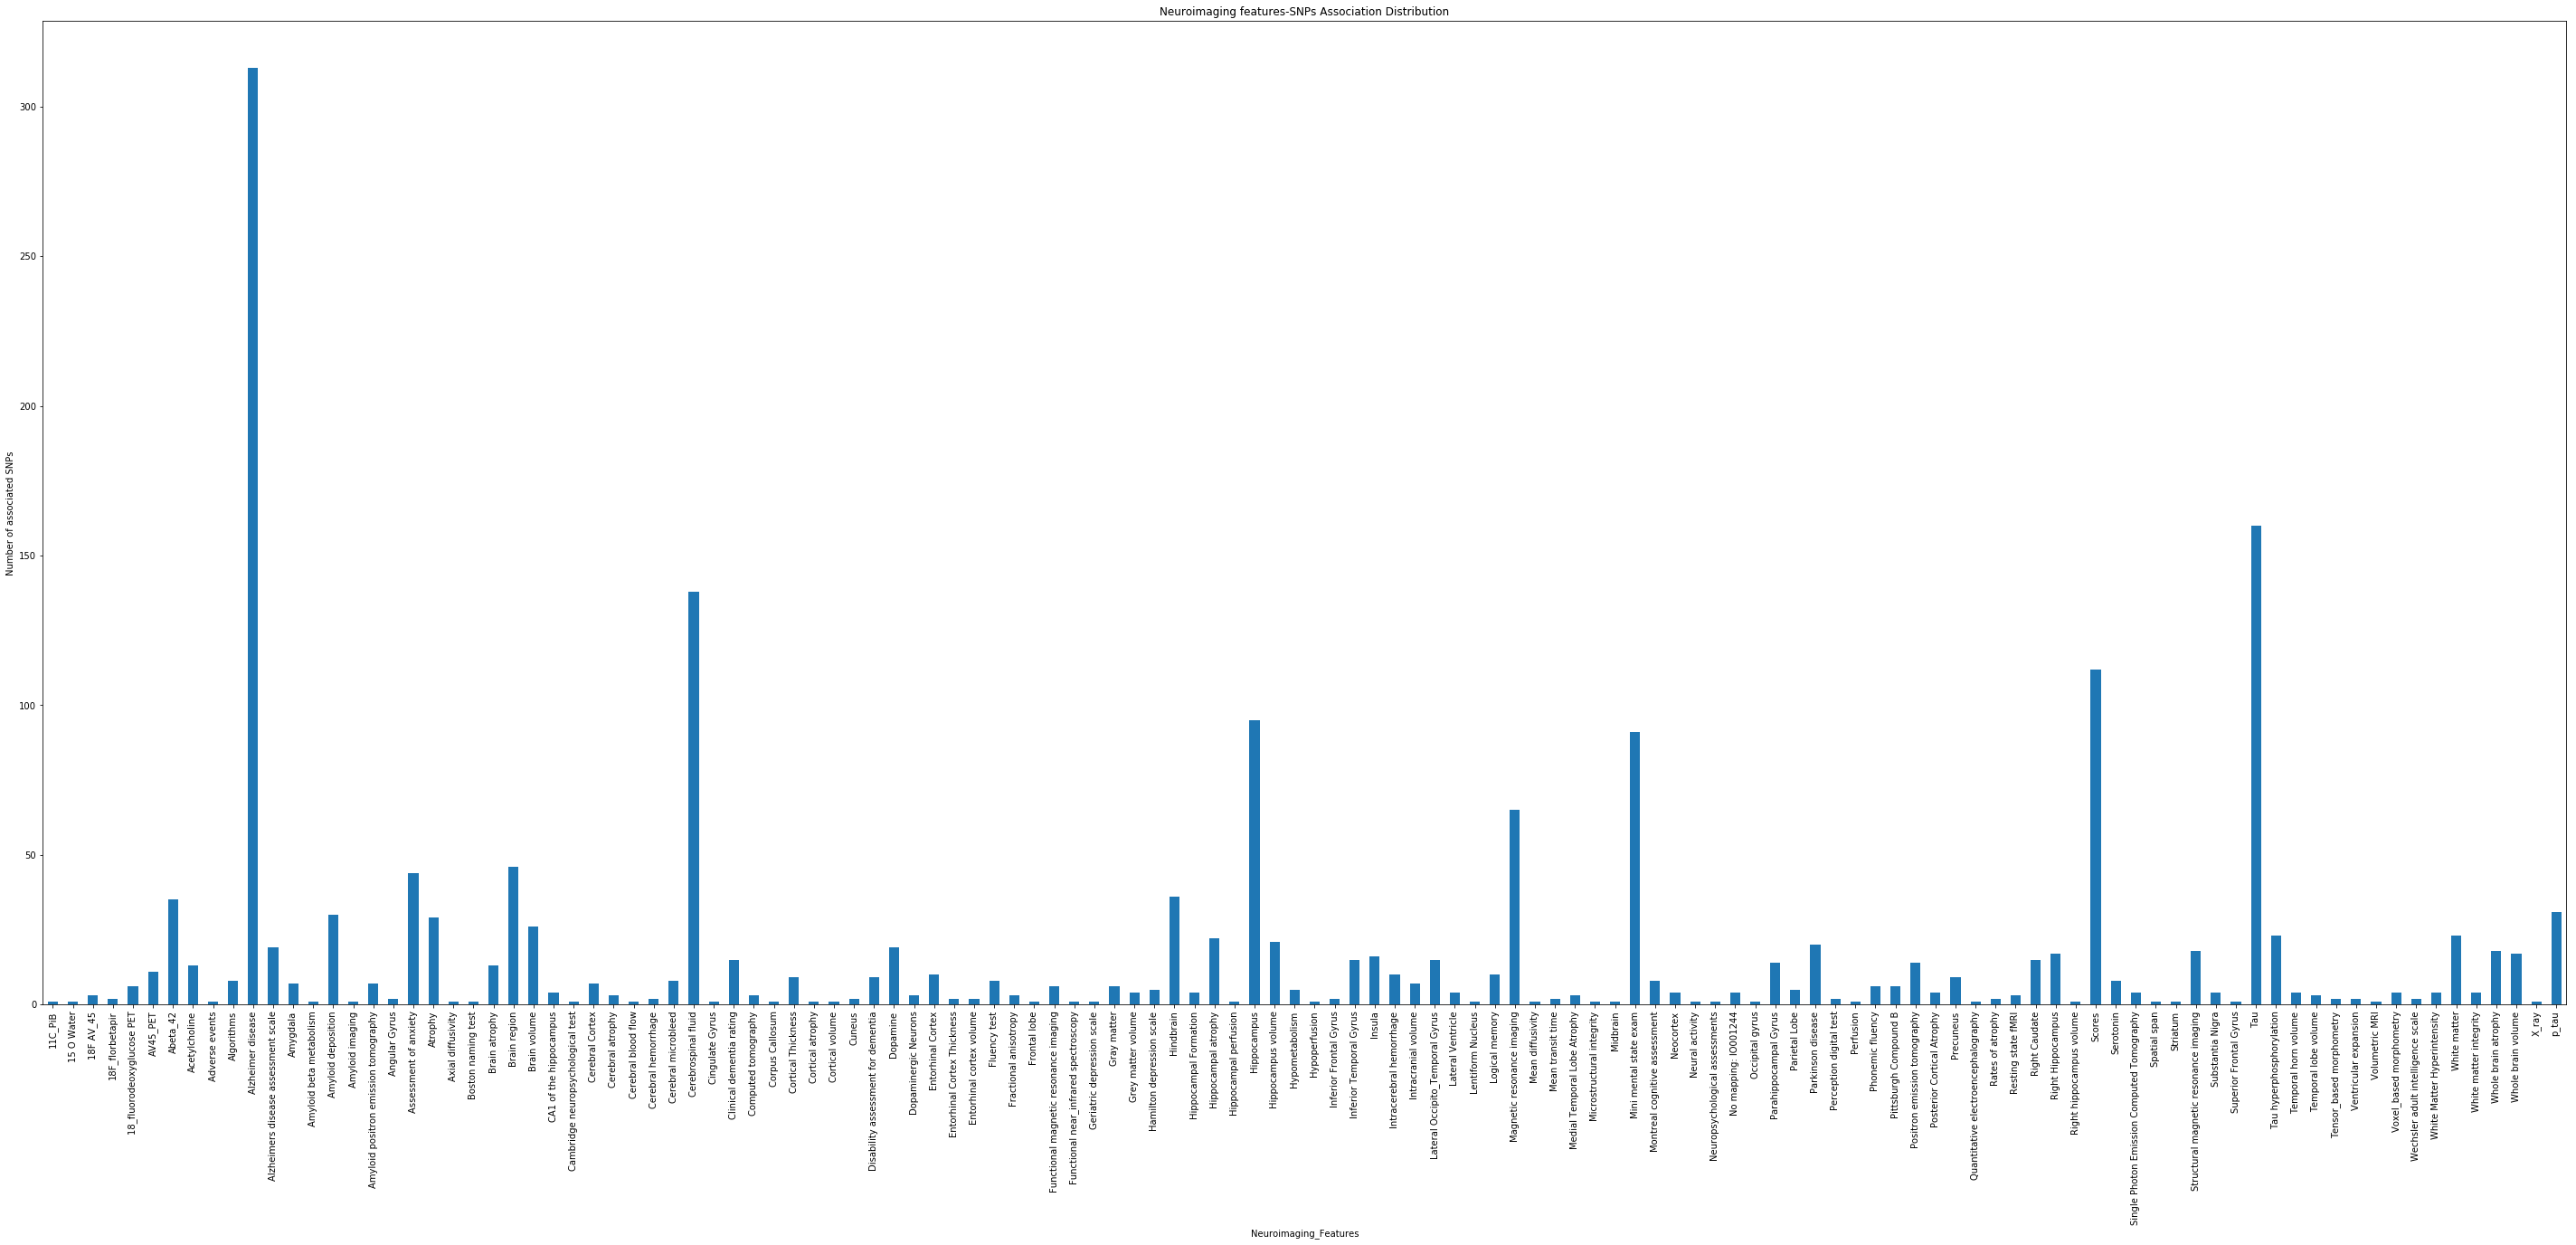

In [2]:
fig, ax = plt.subplots(figsize=(50,20))
SNPs_Neuro_Feats_PMIDs_Merge.groupby('Neuroimaging_Features')['SNPs'].nunique().plot(kind='bar')
ax.set_ylabel('Number of associated SNPs')
ax.set_title('Neuroimaging features-SNPs Association Distribution')
plt.show()

# Step 3:

**Linkage Disequilibrium (LD) block analysis**

**3-1:** Since Haploreg (https://pubs.broadinstitute.org/mammals/haploreg/haploreg.php) provide this opportunity to upload the interested SNPs as a file for further Linkage Disequilibrium (LD) block analysis, the literature extracted SNPs from the previous step was written into a file and uploaded into HaploReg to extract the co-occurring SNPs with the literature mined ones.

In [3]:
with open(folder_path + "/" + "Unique_SNPs.txt", 'w') as file:
    for SNP in Unique_SNPs:
        SNP = SNP.replace(SNP[0:2], "rs")
        file.write("{}\n".format(SNP))

**3-2: **After uploading the literature extracted SNPs and doing LD block analysis, the results were downloaded as HTML file and converted to a dataframe containg the SNPs and the corresponding genes 

In [22]:
## Reading the HTML file and converting it into Dataframe, while removing unnecessary information

LD_extracted_SNPs = pd.read_html("/home/skhatami/SNPs-Neuroimaging associations/HaploReg v4.1.html")[3:307]
LD_literature_extracted_SNPs = pd.DataFrame()

for snps_genes_series in LD_extracted_SNPs:
    snps = pd.Series(snps_genes_series[4])
    genes = pd.Series(snps_genes_series[20])
    temp_dict = {"Variants" : snps, "Genes" : genes}
    temp_dict_to_dataframe = pd.DataFrame(temp_dict)
    LD_literature_extracted_SNPs = pd.concat([LD_literature_extracted_SNPs,temp_dict_to_dataframe])

## Removing the uncessary rows
    
LD_literature_extracted_SNPs = LD_literature_extracted_SNPs[LD_literature_extracted_SNPs.Genes != "GENCODEgenes"]
print(LD_literature_extracted_SNPs)

## Extracting the unique genes to use for the next step

Unique_Genes = LD_literature_extracted_SNPs['Genes'].unique()
Unique_SNPs_LD = LD_literature_extracted_SNPs['Variants'].unique()
print('Number of unique genes:',len(Unique_Genes))
print('Number of unique SNPs after LD block analysis:',len(Unique_SNPs_LD))

                    Genes     Variants
1                   PVRL2  rs142042446
2                   PVRL2   rs12972156
3                   PVRL2   rs12972970
4                   PVRL2   rs34342646
5      140bp 5' of TOMM40   rs71352238
6                  TOMM40    rs2075650
7                  TOMM40   rs34404554
8                  TOMM40   rs11556505
1          8.1kb 5' of U6    rs7110631
2          5.7kb 5' of U6    rs7941541
3          3.5kb 3' of U6   rs10792832
4          4.3kb 3' of U6    rs3851179
1                   ABCA7    rs3764650
2                   ABCA7    rs4147910
3                   ABCA7    rs4147911
4                   ABCA7   rs73505217
5                   ABCA7   rs78410552
6                   ABCA7   rs76348507
7                   ABCA7   rs67027268
1         30kb 5' of BIN1     rs730482
2         30kb 5' of BIN1     rs744373
1                    APOE     rs769449
2                    APOE     rs429358
1                    APOE       rs7412
1                   APOC3

# Step 4:

**Extracting Diseases associated Genes**

**4-1: **Since DisGeNet (http://www.disgenet.org/) do not provide the opportunity to upload the extracted genes as a file and there is a limitation in entering the number of genes, we had to feed the tool manually and multiple times, leading to have multiple files containing the diseases associated with input genes.  

In [5]:
folder_path = "/home/skhatami/SNPs-Neuroimaging associations/DisGeNet_Genes_diseases_associations"
Diseases_Genes_Associations = pd.DataFrame()

## Concatinating the multiple Genes-Diseases assocation file into one file for further investigation

for file_name in os.listdir(folder_path):
    file = os.path.join(folder_path, file_name)
    temp_diseases_genes_associations = pd.DataFrame(pd.read_csv(file, sep="\t"))
    Diseases_Genes_Associations = pd.concat([Diseases_Genes_Associations,temp_diseases_genes_associations])

**4-1-1: ** While the resulted concatenated diseases-genes association include different information (e.g., disease classes, number of genes, number of SNPs), we were interested in gene names, disease names and the number of publications addressed the association. The number of publications and the disease names further used to cluster the genes into well-known and emerging ones in the context of Alzheimer's Disease.  

In [6]:
## Removing the unnecessary information

Diseases_Genes_Associations = Diseases_Genes_Associations.drop(Diseases_Genes_Associations.columns[[1,3,4,5,6,7,8,9,10,11,13,14,15]], axis=1)

## Narrowing the obtained broad rage of diseases into Alzheimer's Disease

Diseases_Genes_Associations = Diseases_Genes_Associations.loc[(Diseases_Genes_Associations["Disease"] == "Alzheimer's Disease") | (Diseases_Genes_Associations["Disease"] == "Alzheimer Disease")]
print("Number of Alzheimer's disease associated genes:",len(Diseases_Genes_Associations))

## Cluster the genes into well-known and emerging ones based on the number of published publication regarding their association with Alzheimer's Disease 

Diseases_Genes_Associations = Diseases_Genes_Associations.sort_values(by=['Disease', "N_PMIDs"])
Diseases_Genes_Associations = Diseases_Genes_Associations.loc[Diseases_Genes_Associations['N_PMIDs'] <= 5]
print("Number of Alzheimer's disease associated genes:",len(Diseases_Genes_Associations))
Diseases_Genes_Associations

Number of Alzheimer's disease associated genes: 136
Number of Alzheimer's disease associated genes: 58


,Gene,Disease,N_PMIDs
1185,APOC3,Alzheimer's Disease,1
1639,MS4A2,Alzheimer's Disease,1
2484,CCND1,Alzheimer's Disease,1
3308,RAB38,Alzheimer's Disease,1
3324,DAOA-AS1,Alzheimer's Disease,1
5023,DRD2,Alzheimer's Disease,1
5287,LOXL1,Alzheimer's Disease,1
6188,RAF1,Alzheimer's Disease,1
8145,ANKK1,Alzheimer's Disease,1
8191,CCR2,Alzheimer's Disease,1


**4-1-2: ** Since consideration of multiple phenotypes such as physiological traits or diseases in the context of genetics offers better perception of genetic architecture within the context of biological systems function in human traits and disease, we investigated the association of the not well-established AD genes with the disease linked to conditions with substantial overlap in genetic, pathologic, and clinical manifestation to Alzheimer's Disease, for instance Parkinson’s disease (PD) through DisGeNET. 

In [7]:
## Creating a file with all emerging Alzheimer's Diseases associated genes 

with open(folder_path + "/" + "Emerging_Alzheimer's Diseases_Associated_Genes.txt", 'w') as file:
    for Genes in Diseases_Genes_Associations["Gene"]:
        file.write("{}::\n".format(Genes))

## Converting the obtained file from DisGeNET to a Dataframe for further investigation
        
folder_path = "/home/skhatami/SNPs-Neuroimaging associations/DisGenet_Emerging_Alzheimer_Genes"
DisGenet_Associated_Disease_With_New_Emerging_Alzheimer_Disease_Associated_Genes = pd.DataFrame(pd.read_csv(os.path.join(folder_path + "/" + "DisGenet_Associated_Disease_With_New_Emerging_Alzheimer's_Disease_Associated_Genes.tsv"), sep="\t"))

## Removing the unnecessary information

DisGenet_Associated_Disease_With_New_Emerging_Alzheimer_Disease_Associated_Genes = DisGenet_Associated_Disease_With_New_Emerging_Alzheimer_Disease_Associated_Genes.drop(DisGenet_Associated_Disease_With_New_Emerging_Alzheimer_Disease_Associated_Genes.columns[[1,3,4,5,6,7,8,9,10,11,13,14,15]], axis=1)

## Narrowing the obtained broad rage of diseases into Parkinson’s disease due to its substantial overlap in genetic, pathologic, and clinical manifestation to Alzheimer's Disease

DisGenet_Associated_Disease_With_New_Emerging_Alzheimer_Disease_Associated_Genes = DisGenet_Associated_Disease_With_New_Emerging_Alzheimer_Disease_Associated_Genes.loc[(DisGenet_Associated_Disease_With_New_Emerging_Alzheimer_Disease_Associated_Genes["Disease"] == "Parkinson Disease")]
print("Number of Parkinson's disease associated genes:",len(DisGenet_Associated_Disease_With_New_Emerging_Alzheimer_Disease_Associated_Genes))
DisGenet_Associated_Disease_With_New_Emerging_Alzheimer_Disease_Associated_Genes

Number of Parkinson's disease associated genes: 25


,Gene,Disease,N_PMIDs
1513,TFAM,Parkinson Disease,4
1803,KANSL1,Parkinson Disease,5
2273,CRHR1,Parkinson Disease,3
2481,LMNA,Parkinson Disease,1
4178,GSTO2,Parkinson Disease,4
4213,AKT1,Parkinson Disease,3
4324,CDKN2A,Parkinson Disease,3
4555,GSTO1,Parkinson Disease,3
4840,TSPO,Parkinson Disease,2
6021,ANXA5,Parkinson Disease,1


**4-1-2-1: ** Since multiple genes associated with Parkinson’s disease but with a few available information we selected the one which has the most released information. 

In [8]:
DisGenet_Associated_Disease_With_New_Emerging_Alzheimer_Disease_Associated_Genes = DisGenet_Associated_Disease_With_New_Emerging_Alzheimer_Disease_Associated_Genes.loc[(DisGenet_Associated_Disease_With_New_Emerging_Alzheimer_Disease_Associated_Genes ['N_PMIDs'] >= 5)]
DisGenet_Associated_Disease_With_New_Emerging_Alzheimer_Disease_Associated_Genes

,Gene,Disease,N_PMIDs
1803,KANSL1,Parkinson Disease,5


# Step 5

**Fetching KANSL1 Documents**

In [9]:
import simplejson as json
import requests
import urllib
import getpass
from requests.exceptions import HTTPError
from IPython.core.display import display, HTML

In [10]:
keycloak_uri = 'https://keycloak.scai.fraunhofer.de/auth/realms/SCAI-bio/'
temowl_uri   = 'https://sam1.api.scaiview.com/'
scaiview_uri = 'https://api.scaiview.com/api/v5/'

In [11]:
username = 'sepehr.golriz.khatami@scai-extern.fraunhofer.de'
password = getpass.getpass('Password:')

Password:········


In [12]:
response = requests.post(

    keycloak_uri+'protocol/openid-connect/token', 
    data={'Content-Type':'application/x-www-form-urlencoded', 'username':username, 'password':password,'grant_type':'password', 'client_id':'curl'}
)

token = response.json()['access_token']

In [13]:
query = "KANSL1"
limit = '100'

response = requests.get(
    'https://api.scaiview.com/api/v2/solr/search?',
    params={'q':query, 'rows':limit, 'sortField':'date', 'sortOrder':'DESC', 'collection':'academia_2019_v_1_0_1'},
    headers={'Accept': 'application/json', 'Authorization': 'Bearer '+token},
)
json_response = response.json()

#print(json_response)
documents = json_response['documents']
numFound = json_response['numFound']

#print(documents)

for x in range(0, min(len(documents),numFound-1)):
    print('{}: {} - {}'.format(x+1, documents[x]['id'], documents[x]['title'][0]))

1: PMID:31027501 - Leiomyoma with KAT6B-KANSL1 fusion: case report of a rapidly enlarging uterine mass in a postmenopausal woman.
2: PMID:30914738 - Detection of novel fusion-transcripts by RNA-Seq in T-cell lymphoblastic lymphoma.
3: PMID:30350223 - Robust Findings From 25 Years of PSTD Genetics Research.
4: PMID:29923028 - Genomic convergence of locus-based GWAS meta-analysis identifies AXIN1 as a novel Parkinson's gene.
5: PMID:29892954 - Analyses of karyotype by G-banding and high-resolution microarrays in a gender dysphoria population.
6: PMID:29175309 - Altered neuro-inflammatory gene expression in hippocampus in major depressive disorder.
7: PMID:29225339 - Early speech development in Koolen de Vries syndrome limited by oral praxis and hypotonia.
8: PMID:29352316 - KANSL1 variation is not a major contributing factor in self-limited focal epilepsy syndromes of childhood.
9: PMID:29185983 - NuMA recruits dynein activity to microtubule minus-ends at mitosis.
10: PMID:28901451 - Gen

# Step 6

**Exploring KANSL1 putative role graph in hippocampal atrophy**

In [14]:
import time
import sys
import getpass

import neurommsig_alzheimers_knowledge
import pybel
import pybel_jupyter
from pybel.dsl import BaseAbundance, CentralDogma
from pybel_jupyter import to_jupyter
from pybel.struct import get_subgraph_by_neighborhood
from pybel.struct import get_subgraph_by_annotation_value

In [15]:
print(sys.version)
print(neurommsig_alzheimers_knowledge.VERSION)
print(pybel.get_version())
print(pybel_jupyter.get_version())

3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:09:58) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
0.0.2-dev
0.13.2
0.2.1


In [16]:
AD_graph = neurommsig_alzheimers_knowledge.get_graph()
AD_graph.summarize()

NeuroMMSig Alzheimer's Disease Knowledge Assembly v0.0.2-dev
Number of Nodes: 5165
Number of Edges: 17226
Number of Citations: 1972
Number of Authors: 10234
Network Density: 6.46E-04
Number of Components: 24
Number of Warnings: 0


In [17]:
query_nodes = []

for node in AD_graph:
    if not isinstance(node,BaseAbundance):
        continue
    namespace = node.namespace
    if namespace != "HGNC":
        continue
    name = node.name
    if name != "KANSL1":
        continue
    query_nodes.append(node)

query_nodes

[<BEL p(HGNC:KANSL1)>]

In [18]:
KANSL1_gaph = get_subgraph_by_annotation_value(AD_graph,"Subgraph","KANSL1 subgraph")
KANSL1_gaph.summarize()

None vNone
Number of Nodes: 25
Number of Edges: 35
Number of Citations: 5
Number of Authors: 65
Network Density: 5.83E-02
Number of Components: 4
Number of Warnings: 0


In [19]:
for node in list(KANSL1_gaph):
    if not isinstance(node, CentralDogma):
        continue
    if not node.variants:
        continue

    parent = node.get_parent()
    
    print(repr(parent))
    KANSL1_gaph.add_has_variant(parent, node)

<BEL p(SFAM:"Histone H4 Family")>
<BEL p(SFAM:"MAPK p38 Family")>
<BEL p(GFAM:"Mitogen-activated protein kinases")>
<BEL p(HGNC:MAPT)>
<BEL p(HGNC:MAPT)>
<BEL p(HGNC:TP53)>


In [20]:
to_jupyter(KANSL1_gaph)   TCR-mediated signaling

<IPython.core.display.Javascript object>